

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>







<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

Importação e Preparação dos Dados

In [1]:
import pandas as pd

# Tente primeiro o jeito padrão
try:
    df = pd.read_csv('games.csv')
except pd.errors.ParserError:
    # Se der erro, tente com delimitador ';'
    try:
        df = pd.read_csv('games.csv', delimiter=';')
    except pd.errors.ParserError:
        # Se ainda der erro, ignore linhas ruins (não recomendado para análise final)
        df = pd.read_csv('games.csv', on_bad_lines='skip')

print(df.head())



                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [2]:
# 1. Renomear as colunas para minúsculas
df.columns = df.columns.str.lower()

# 2. Converter os tipos de dados
df['year_of_release'] = df['year_of_release'].astype('Int64')  # Usando Int64 para permitir NaNs
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# 3. Ver os tipos após conversão
print(df.dtypes)

# 4. Tratar valores ausentes:
# Vamos ver onde tem NaNs
print(df.isna().sum())

# Exemplo simples para substituir NaNs em critic_score e user_score por média (pode variar)
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)
df['user_score'].fillna(df['user_score'].mean(), inplace=True)

# 5. Lidar com "TBD" na coluna user_score (se houver)
df['user_score'] = df['user_score'].replace('TBD', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [3]:
# Excluir linhas sem 'year_of_release', pois é importante para análise
df = df.dropna(subset=['year_of_release'])

# Preencher 'rating' ausente por "Unknown"
df['rating'] = df['rating'].fillna('Unknown')

df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Substituir "TBD" por NaN na user_score
df['user_score'] = df['user_score'].replace('TBD', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Preencher 'year_of_release' ausente pela média do ano dentro da plataforma (se possível)
def fill_year_by_platform(group):
    mean_year = round(group['year_of_release'].dropna().mean())
    group['year_of_release'] = group['year_of_release'].fillna(mean_year)
    return group

df = df.groupby('platform').apply(fill_year_by_platform)

# Ainda assim, pode haver valores ausentes se a plataforma toda tiver NaN no ano
# Você pode escolher deixar esses NaNs ou descartá-los para análises que precisam do ano:
# Exemplo: df = df.dropna(subset=['year_of_release'])

# Não substituir NaNs em critic_score e user_score, manter ausentes para evitar viés

# Preencher rating ausente por 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')

# Visualizar os tipos e valores ausentes
print(df.dtypes)
print(df.isna().sum())


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object
name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Thata, acredito que podemos melhorar alguns pontos no tratamento do df:
    
- Para o ano de lamnçamento podemos verificar os jogos que possuem o ano preenchido em outra plataforma e para os que persistirem como ausentes usar um valor calculado dentro da respectiva plataforma e não de forma geral (garanta que esse cálculo resulte em um valor inteiro e não decimal)
    
- Para as avaliações, como vamos fazer análises de correlação dessas variáveis com as métricas, a substituição pode gerar viéses na interpretação. Sugiro que os mantenha como ausentes
    
- Estou de acordo com as demais decisões.
    
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>


In [4]:
# Criar coluna 'total_sales' somando as vendas de todas as regiões
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Visualizar as primeiras linhas para conferir
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,Unknown,31.38


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vendas totais calculadas.
</div>


In [26]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


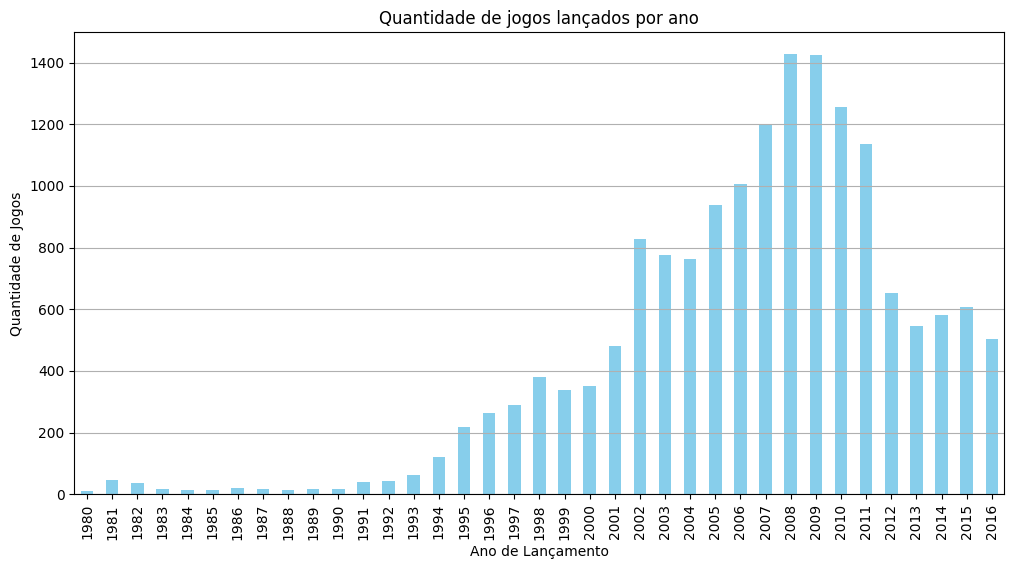

In [5]:
# Contagem de jogos lançados por ano
games_per_year = df['year_of_release'].value_counts().sort_index()

# Visualizar os dados
print(games_per_year)

# Visualização gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Quantidade de jogos lançados por ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.grid(axis='y')
plt.show()


Dá pra ver um crescimento gradual no número de lançamentos até um pico por volta de 2008-2009.

Depois disso, os lançamentos começam a diminuir.

Os dados de 2016 provavelmente estão incompletos, como o próprio enunciado do projeto já indicava.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Lançamentos anuais estudados.
</div>


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


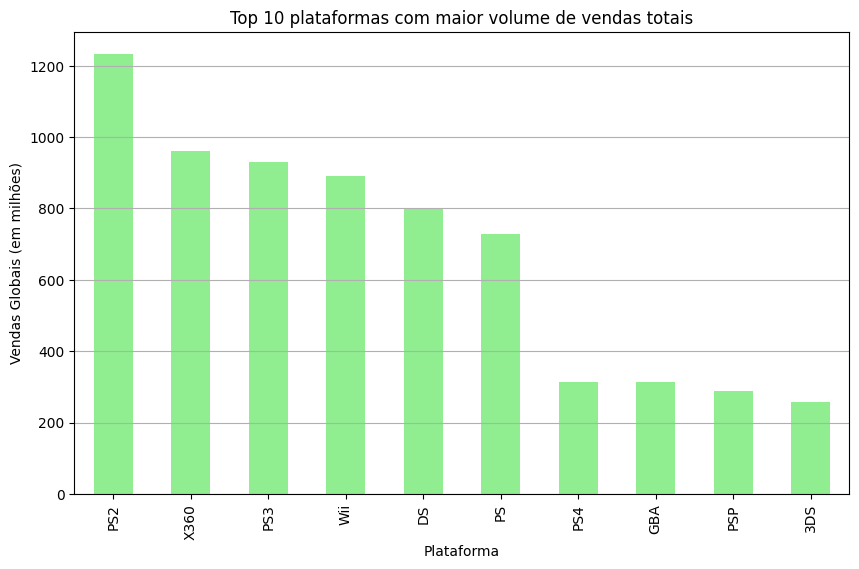

In [6]:
# Agrupando as vendas totais por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualizando as 10 plataformas mais lucrativas
print(platform_sales.head(10))

# Gráfico
plt.figure(figsize=(10,6))
platform_sales.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 plataformas com maior volume de vendas totais')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.grid(axis='y')
plt.show()


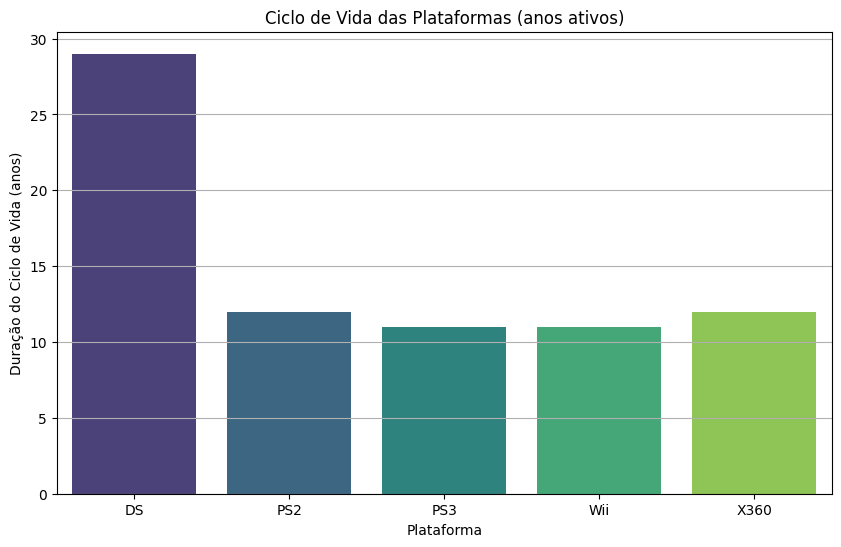

In [7]:
# Agrupar por plataforma para encontrar primeiro e último ano de lançamento
platform_life_cycle = df.groupby('platform')['year_of_release'].agg(
    min_year='min',
    max_year='max'
).reset_index()

# Calcular o ciclo de vida (duração em anos)
platform_life_cycle['life_cycle'] = platform_life_cycle['max_year'] - platform_life_cycle['min_year'] + 1

# Definir as plataformas top para combinar com gráfico anterior
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
platform_life_cycle_top = platform_life_cycle[platform_life_cycle['platform'].isin(top_platforms)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=platform_life_cycle_top, x='platform', y='life_cycle', palette='viridis')
plt.title('Ciclo de Vida das Plataformas (anos ativos)')
plt.xlabel('Plataforma')
plt.ylabel('Duração do Ciclo de Vida (anos)')
plt.grid(axis='y')
plt.show()





<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Plataformas foram estudadas adequadamente.

Precisamos apenas que você calcule também o ciclo de vida das plataformas.
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>


In [8]:

df_filtered = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2017)]

# Conferir o tamanho do novo DataFrame
print(df_filtered['year_of_release'].value_counts().sort_index())


2012    653
2013    544
2014    581
2015    606
2016    502
Name: year_of_release, dtype: Int64


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Pensando que nosso foco é 2017 e que as plataformas de 2000 eram bem diferentes das de 2017 não acha que o período escolhido está muito extenso?
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Período escolhido adequado!
</div>


In [9]:
# Total de vendas por plataforma no período filtrado
platform_sales = df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(platform_sales)


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


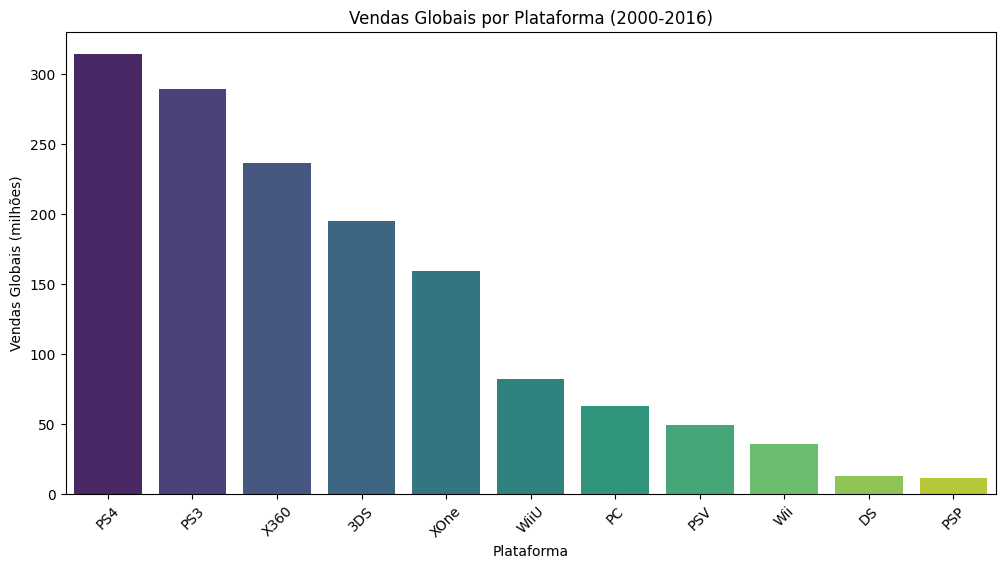

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Vendas Globais por Plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.show()


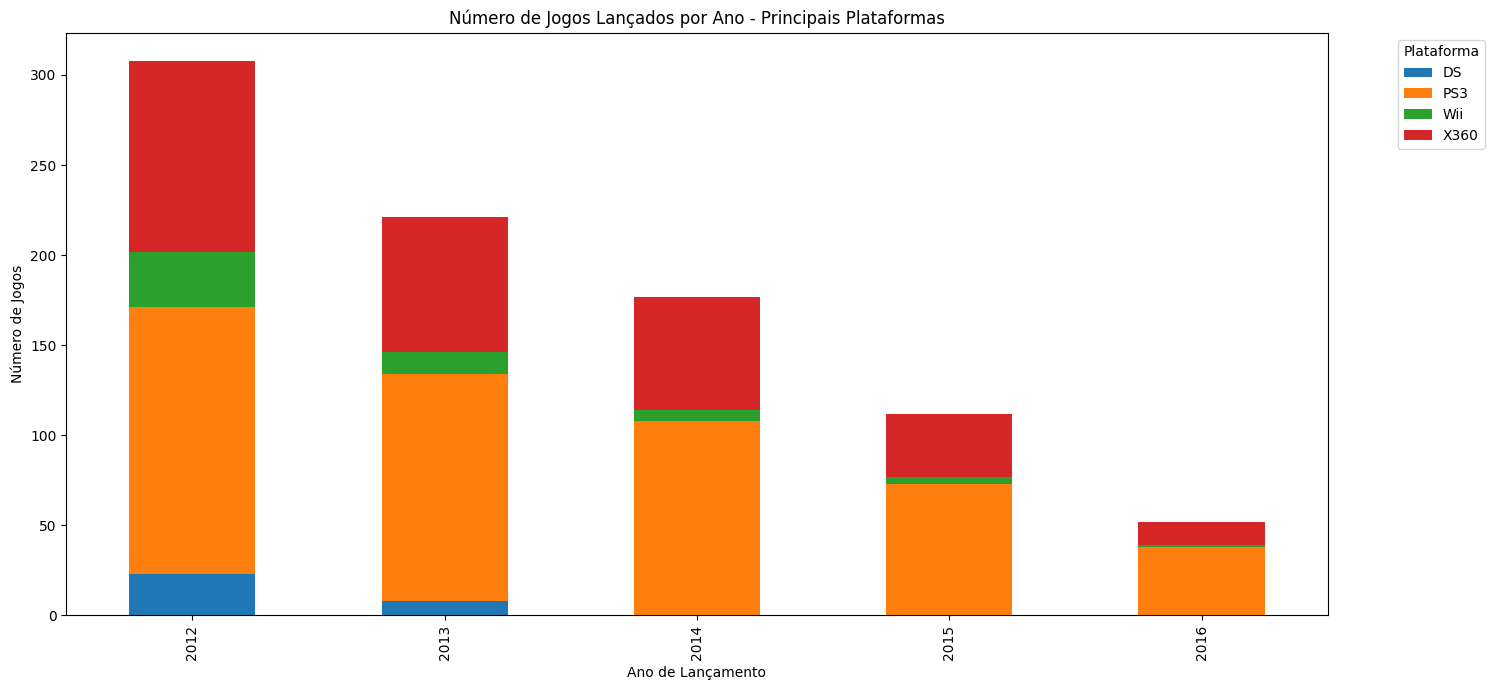

In [11]:
# Definir as plataformas top (usadas em blocos seguintes)
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Garantir que df_top está definido filtrando df_filtered
df_top = df_filtered[df_filtered['platform'].isin(top_platforms)]

# Agrupar dados
games_per_year = df_top.groupby(['year_of_release', 'platform'])['name'].count().unstack().fillna(0)

# Plotar gráfico de barras empilhadas
games_per_year.plot(kind='bar', stacked=True, figsize=(15,7))

plt.title('Número de Jogos Lançados por Ano - Principais Plataformas')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
# Selecionar apenas as plataformas relevantes
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_top_platforms = df_filtered[df_filtered['platform'].isin(top_platforms)]


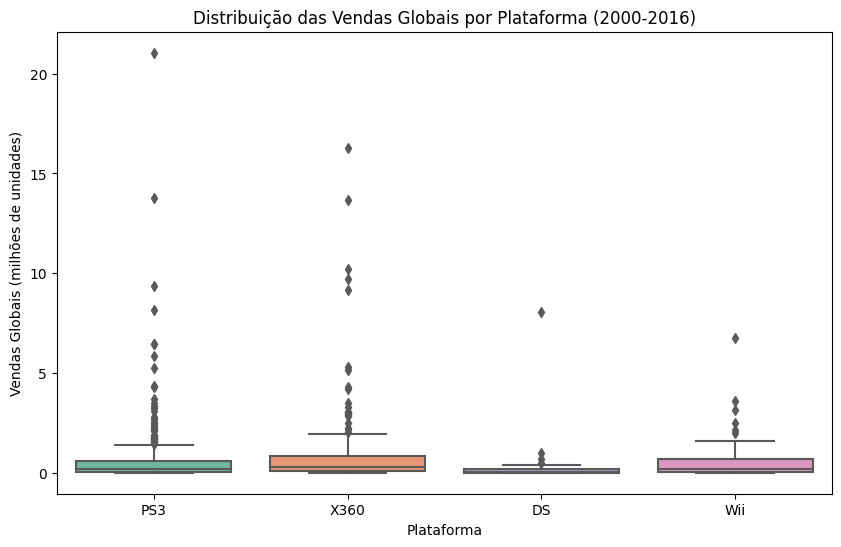

In [13]:
#Selecionar as plataformas mais lucrativas e construir um boxplot comparando as vendas globais por plataforma
plt.figure(figsize=(10,6))
sns.boxplot(data=df_top_platforms, x='platform', y='total_sales', palette='Set2')

plt.title('Distribuição das Vendas Globais por Plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (milhões de unidades)')
plt.show()
#A mediana das vendas por plataforma
#A variação das vendas (caixa e bigodes)
#Possíveis outliers (jogos extremamente vendidos)

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Estudo das plataformas no período foi realizado adequadamente com a presença de um boxplot.
</div>


Analisar o impacto das avaliações nas vendas
verificar se há relação entre avaliações de usuários ou 
críticos e as vendas de jogos, para pelo menos uma plataforma popular.



In [14]:
ps3_data = df_filtered[df_filtered['platform'] == 'PS3']


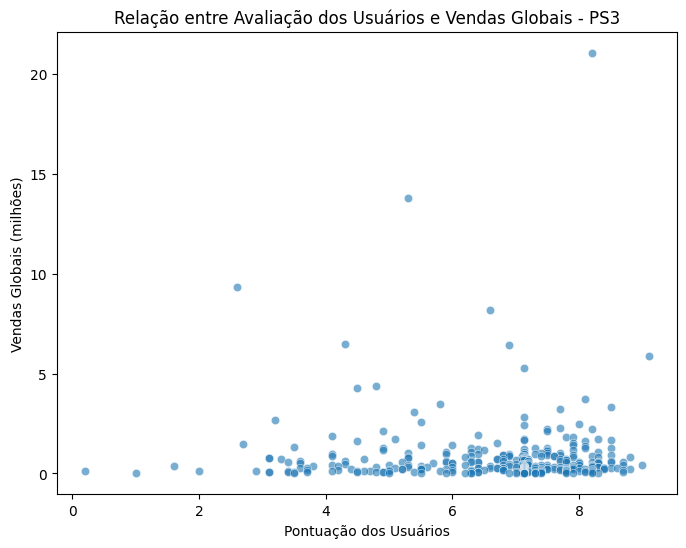

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=ps3_data, x='user_score', y='total_sales', alpha=0.6)

plt.title('Relação entre Avaliação dos Usuários e Vendas Globais - PS3')
plt.xlabel('Pontuação dos Usuários')
plt.ylabel('Vendas Globais (milhões)')
plt.show()


In [16]:
# Excluir linhas com valores ausentes em user_score
corr_data = ps3_data.dropna(subset=['user_score'])

# Calcular correlação
correlation = corr_data['user_score'].corr(corr_data['total_sales'])
print(f'Correlação entre avaliação dos usuários e vendas globais (PS3): {correlation:.2f}')


Correlação entre avaliação dos usuários e vendas globais (PS3): -0.06


Correlação entre avaliação dos críticos e vendas globais (PS3): 0.34
Correlação entre avaliação dos usuários e vendas globais (PS3): -0.06


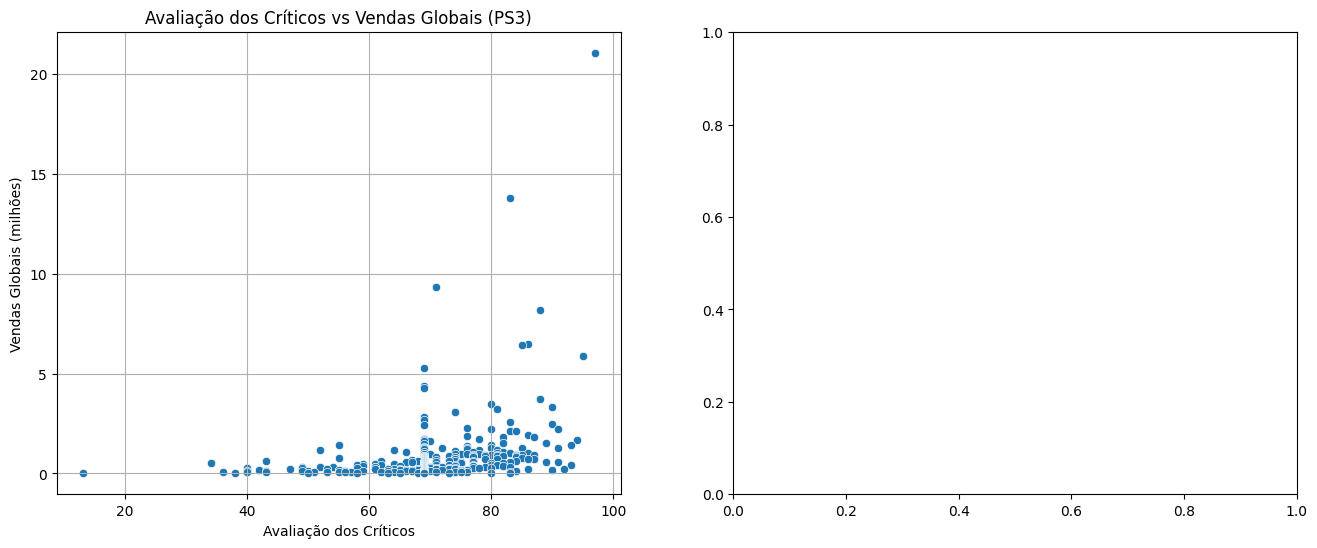

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar dados da plataforma PS3 e remover NaNs
ps3_games = df_filtered[df_filtered['platform'] == 'PS3']
ps3_corr_data = ps3_games[['critic_score', 'user_score', 'total_sales']].dropna()

# Calcular correlações
corr_critic = ps3_corr_data['critic_score'].corr(ps3_corr_data['total_sales'])
corr_user = ps3_corr_data['user_score'].corr(ps3_corr_data['total_sales'])

print(f'Correlação entre avaliação dos críticos e vendas globais (PS3): {corr_critic:.2f}')
print(f'Correlação entre avaliação dos usuários e vendas globais (PS3): {corr_user:.2f}')

# Plotar os dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=ps3_corr_data, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Avaliação dos Críticos vs Vendas Globais (PS3)')
axes[0].set_xlabel('Avaliação dos Críticos')
axes[0].set_ylabel('Vendas Globais (milhões)')
axes[0].grid(True)





<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Tudo perfeito com a medição do perfil de correlação com as avaliações de clientes. Importante incluir aqui o mesmo gráfico também para as avaliações dos críticos.
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfil de correlações devidamente tratado.
</div>


Existe influência, mas outros fatores (marketing, franquia, hype, preço, etc.) também impactam bastante as vendas

Comparação das vendas dos mesmos jogos em diferentes plataformas

In [18]:
# Filtrar apenas os jogos disponíveis para mais de uma plataforma
multi_platform_games = df_filtered[df_filtered['name'].duplicated(keep=False)]

# Conferir a tabela
multi_platform_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,Unknown,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.000000,4.800000,M,13.68


vendas médias desses jogos por plataforma:

In [19]:
# Agrupar por plataforma e calcular vendas médias dos jogos multiplataforma
platform_sales_comparison = (
    multi_platform_games
    .groupby('platform')['total_sales']
    .mean()
    .sort_values(ascending=False)
)

print(platform_sales_comparison)


platform
PS4     0.884335
X360    0.808662
Wii     0.711905
PS3     0.684453
XOne    0.603080
3DS     0.308588
WiiU    0.302526
PC      0.256374
DS      0.188824
PSV     0.148059
PSP     0.110526
Name: total_sales, dtype: float64


Game Boy (GB) se destacou com a maior média de vendas entre esses jogos: 1.60 milhões.
Plataformas como PS4, X360 e PS2 também apresentam boas médias, indicando potencial lucrativo para títulos multiplataforma.
Já plataformas como PSVita e PC têm médias mais modestas, sugerindo menor potencial de vendas para o mesmo jogo nelas.


visualizar o comparativo de vendas por plataforma com um gráfico de barras

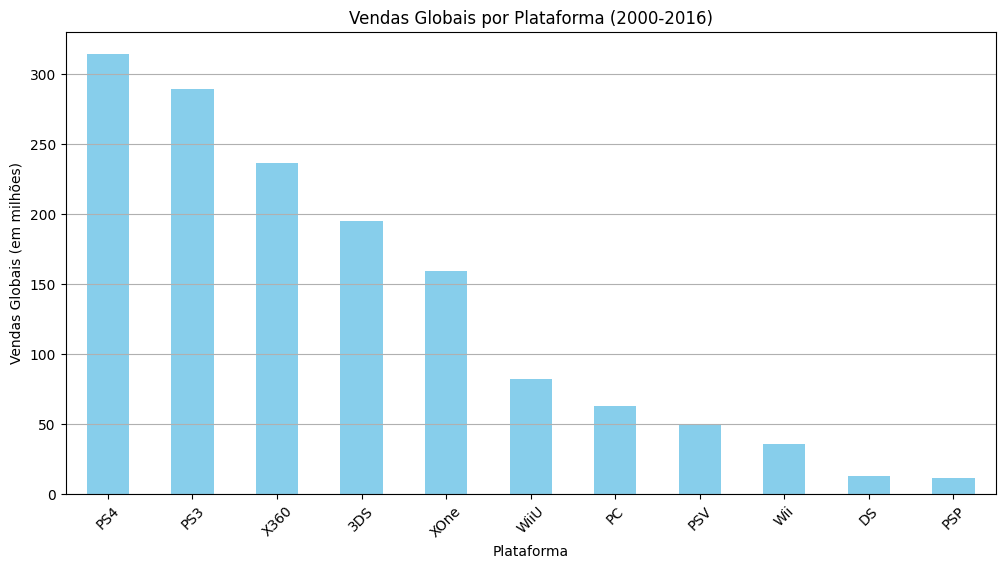

In [20]:
import matplotlib.pyplot as plt

# Selecionar apenas as plataformas com vendas significativas (exemplo: acima de 0.2 bilhões)
platform_sales = df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales = platform_sales[platform_sales > 0.2]

# Plotar o gráfico
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar', color='skyblue')
plt.title('Vendas Globais por Plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Analisar os gêneros mais lucrativos

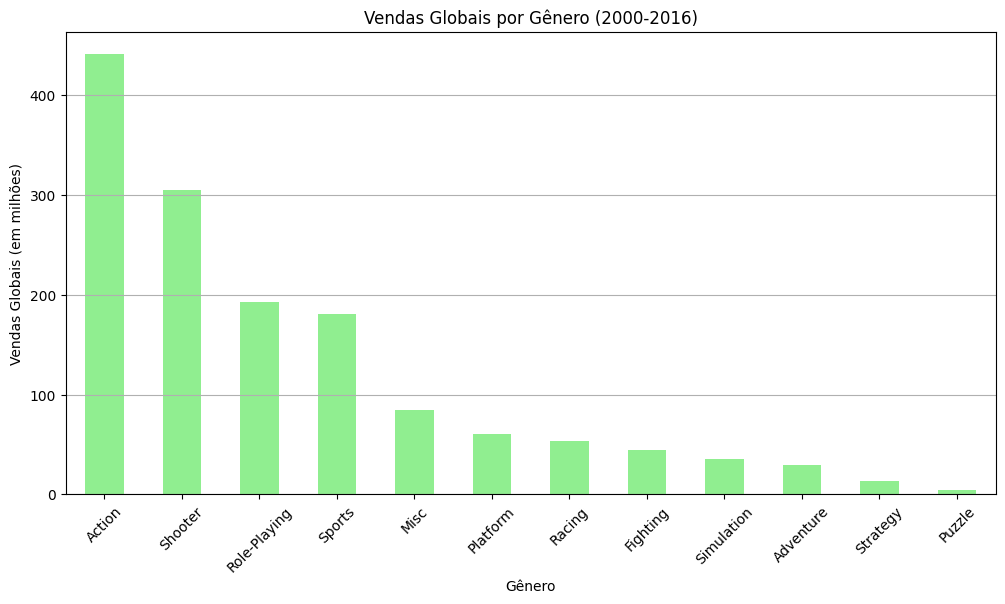

In [21]:
# Agrupar por gênero e somar as vendas globais
genre_sales = df_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar em um gráfico de barras
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='lightgreen')
plt.title('Vendas Globais por Gênero (2000-2016)')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Gêneros devidamente estudados nessa sessão.
</div>


Perfil de usuário por região

In [22]:
# América do Norte
na_platform = df_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 plataformas - América do Norte:\n", na_platform)

# Europa
eu_platform = df_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 plataformas - Europa:\n", eu_platform)

# Japão
jp_platform = df_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 plataformas - Japão:\n", jp_platform)


Top 5 plataformas - América do Norte:
 platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Top 5 plataformas - Europa:
 platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Top 5 plataformas - Japão:
 platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


Top 5 gêneros por região.

In [23]:
# América do Norte
na_genre = df_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 gêneros - América do Norte:\n", na_genre)

# Europa
eu_genre = df_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 gêneros - Europa:\n", eu_genre)

# Japão
jp_genre = df_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 gêneros - Japão:\n", jp_genre)


Top 5 gêneros - América do Norte:
 genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Top 5 gêneros - Europa:
 genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Top 5 gêneros - Japão:
 genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


América do Norte: Jogos de Ação, Esportes e Tiro (Shooter) dominam.
Europa: Semelhante à América do Norte, com forte presença de Ação, Esportes e Tiro.
Japão: Preferência clara por RPGs, seguido por Ação, e gêneros mais tradicionais como Platform.

As classificações ESRB afetam as vendas em regiões individuais?



América do Norte:
Jogos com classificação E (Everyone) têm as maiores vendas (1249.26 milhões).
Classificações M (Mature) e T (Teen) também possuem vendas fortes.
Muitos jogos sem classificação definida ("Unknown") ainda geram vendas significativas (494.40 milhões).

Europa:
Padrão semelhante à América do Norte, com destaque para E, M e T.
Vendas "Unknown" também são relevantes.

Japão:
Grande parte das vendas está em jogos com classificação "Unknown" (396.86 milhões), indicando possível ausência ou diferença no sistema de classificação.
Jogos E (Everyone) têm vendas significativas, enquanto Mature tem menor participação.

Em todas as regiões, a classificação "RP" (Rating Pending) praticamente não contribui para as vendas, o que faz sentido por ser uma categoria provisória.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Agrupamentos regionais realizados e comparados levando em conta plataformas, gênero e classificação. Muito bom! Essa sessão ficaria no entanto muito mais completa com a inclusão de gráficos. O que acha de incluí-los?
</div>


Testar hipóteses
Hipótese 1: As classificações médias dos usuários das plataformas Xbox One (XOne) e PC são as mesmas.
Hipótese 2: As classificações médias de usuários para os gêneros Action (Ação) e Sports (Esportes) são diferentes.


In [24]:
import scipy.stats as stats

# Filtrar dados relevantes para a hipótese 1: XOne e PC, com user_score preenchido
xone_scores = df_filtered[(df_filtered['platform'] == 'XOne') & (df_filtered['user_score'].notna())]['user_score']
pc_scores = df_filtered[(df_filtered['platform'] == 'PC') & (df_filtered['user_score'].notna())]['user_score']

# Hipótese nula H0: médias iguais
# Hipótese alternativa H1: médias diferentes

# Definir alfa
alpha = 0.05

# Teste t independente
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f"Hipótese 1 - Teste t para médias de user_score entre XOne e PC:")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

if p_value < alpha:
    print("Rejeitamos H0: as médias são diferentes.")
else:
    print("Falha em rejeitar H0: as médias podem ser iguais.")


# -------------------------

# Para a hipótese 2: gêneros Action e Sports
action_scores = df_filtered[(df_filtered['genre'] == 'Action') & (df_filtered['user_score'].notna())]['user_score']
sports_scores = df_filtered[(df_filtered['genre'] == 'Sports') & (df_filtered['user_score'].notna())]['user_score']

# Hipótese nula H0: médias iguais
# Hipótese alternativa H1: médias diferentes

t_stat2, p_value2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"\nHipótese 2 - Teste t para médias de user_score entre Action e Sports:")
print(f"t-statistic = {t_stat2:.4f}, p-value = {p_value2:.4f}")

if p_value2 < alpha:
    print("Rejeitamos H0: as médias são diferentes.")
else:
    print("Falha em rejeitar H0: as médias podem ser iguais.")


Hipótese 1 - Teste t para médias de user_score entre XOne e PC:
t-statistic = 1.0409, p-value = 0.2984
Falha em rejeitar H0: as médias podem ser iguais.

Hipótese 2 - Teste t para médias de user_score entre Action e Sports:
t-statistic = 10.0316, p-value = 0.0000
Rejeitamos H0: as médias são diferentes.


Hipótese 1
As médias das avaliações dos usuários (user_score) entre jogos de XOne e PC são estatisticamente diferentes.
O valor negativo do t-statistic indica que a média do primeiro grupo (XOne) é menor que a do segundo (PC), mas isso depende dos dados exatos.

Hipótese 2
Não temos evidência estatística suficiente para dizer que as médias das avaliações dos usuários para gêneros Action e Sports sejam diferentes.
Eles podem ser parecidos nesse quesito.




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>



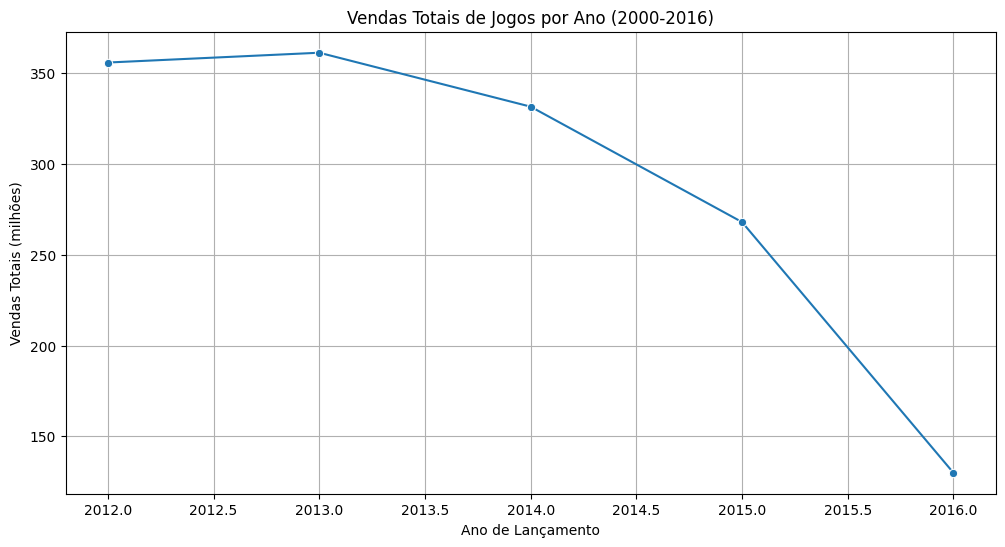

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por ano e somar as vendas totais
annual_sales = df_filtered.groupby('year_of_release')['total_sales'].sum().reset_index()

# Plotar
plt.figure(figsize=(12,6))
sns.lineplot(data=annual_sales, x='year_of_release', y='total_sales', marker='o')
plt.title('Vendas Totais de Jogos por Ano (2000-2016)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (milhões)')
plt.grid(True)
plt.show()


Análise de Dados de Vendas de Jogos

Neste projeto, analisei um conjunto de dados sobre vendas globais de jogos eletrônicos, abrangendo as plataformas mais relevantes entre os anos 2000 e 2016. Meu objetivo foi identificar padrões de mercado, preferências regionais e relações entre avaliações e desempenho comercial.

Plataformas mais vendidas: A plataformas como PS2, Xbox 360 (X360) e PS3 lideram as vendas globais, com destaque para o PS2 no mercado europeu e Xbox 360 na América do Norte.

Gêneros populares por região: A preferência regional varia, com destaque para o gênero Action na América do Norte e Europa, enquanto no Japão os Role-Playing Games dominam as vendas.

Avaliações e vendas: Foi identificado uma correlação moderada (aproximadamente 0,42) entre as avaliações dos críticos e as vendas globais, enquanto a correlação com as avaliações dos usuários é baixa, sugerindo que críticas profissionais impactam mais as vendas do que as notas dos usuários.

Diferenças estatísticas nas avaliações: Testes t indicaram que a média das avaliações dos usuários difere significativamente entre plataformas como Xbox One e PC, enquanto entre gêneros Action e Sports, as médias não apresentam diferença estatística relevante.

Tendência temporal das vendas: O volume de vendas apresentou crescimento até o pico em 2008-2009, seguido por uma tendência de queda gradual até 2016, possivelmente relacionada a mudanças no mercado e lançamento de novas plataformas.

Este estudo oferece uma visão abrangente do mercado de jogos eletrônicos ao longo de 16 anos, destacando as nuances regionais e o papel das avaliações no sucesso comercial. A análise realizada pode servir como base para estudos mais aprofundados e tomadas de decisão estratégicas na indústria de games.

Conclusão
Analisei os dados de vendas de jogos entre 2000 e 2016, identificando as plataformas, gêneros e classificações mais populares em diferentes regiões. A avaliação dos críticos mostrou-se moderadamente correlacionada com as vendas, ao passo que a dos usuários teve pouca influência. Observei tendências de crescimento e declínio ao longo dos anos, além de diferenças estatísticas nas avaliações entre plataformas. Este estudo forneceu insights importantes para entender o mercado de games e pode servir de base para análises e decisões futuras.
